<a href="https://colab.research.google.com/github/arthurantonio/dsmovie/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trabalho Final Laboratório de Introdução a Ciência da Computação
* Arthur Antonio Rezende Pereira - N° USP: 15111735



###Conectando ao drive e importando bibliotecas

In [8]:
# Bibliotecas Utilizadas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl
import sys

In [9]:
from google.colab import drive
drive.mount('/content/drive/') # Montar o drive

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Nesse ponto, o drive já está conectado e em seguida é lido o arquivo xlsx e transformando em um array do numpy

In [10]:
caminho = '/content/drive/MyDrive/LabICC/data/Oil-Production-10years-America.xlsx'
arquivo_excel = openpyxl.load_workbook(caminho)
folha = arquivo_excel['Planilha1']
paises = np.array([[celula.value for celula in linha[0:12]] for linha in folha.iter_rows(min_row=2, max_row=12)])


print(paises)

[['Thousand barrels daily' '2012.0' '2013.0' '2014.0' '2015.0' '2016.0'
  '2017.0' '2018.0' '2019.0' '2020.0' '2021.0' '2022.0']
 ['Canada' '3740.0' '4000.0' '4271.0' '4388.0' '4464.0' '4813.0' '5244.0'
  '5372.0' '5130.0' '5414.0' '5576.0']
 ['Mexico' '2912.0' '2882.0' '2792.0' '2593.0' '2461.0' '2227.0' '2072.0'
  '1921.0' '1912.0' '1928.0' '1944.0']
 ['US' '8932.0' '10103.0' '11808.0' '12784.0' '12357.0' '13142.0'
  '15323.0' '17139.0' '16492.0' '16679.0' '17770.0']
 ['Argentina' '657.0' '644.0' '638.0' '646.0' '610.0' '590.0' '591.0'
  '620.0' '601.0' '628.0' '706.0']
 ['Brazil' '2145.0' '2110.0' '2341.0' '2525.0' '2607.0' '2731.0' '2691.0'
  '2890.0' '3030.0' '2990.0' '3107.0']
 ['Colombia' '944.0' '1010.0' '990.0' '1006.0' '886.0' '854.0' '865.0'
  '886.0' '781.0' '736.0' '754.0']
 ['Ecuador' '505.0' '527.0' '557.0' '543.0' '548.0' '531.0' '517.0'
  '531.0' '479.0' '473.0' '481.0']
 ['Peru' '157.0' '171.0' '175.0' '153.0' '141.0' '136.0' '139.0' '144.0'
  '131.0' '128.0' '128.0']

Transformando em um data frame do pandas, pois acho mais simples de utilizar

In [11]:
paises_df = pd.DataFrame(paises)
paises_df = paises_df.iloc[1:11, 1:12]

novos_nomes_linhas = {1: 'Canada', 2: 'Mexico', 3: "US", 4 : "Argentina" , 5: "Brazil" , 6: "Colombia" , 7 : "Ecuador", 8 : "Peru" , 9 : "Trinidad & Tobago" , 10 : "Venezuela"}

novos_nomes_colunas = {'Oil Production in thousands of barrels per day*': 'Thousand barrels daily', 1: '2012', 2 : '2013' , 3: '2014', 4: '2015', 5: '2016', 6: '2017', 7: '2018', 8: '2019', 9: '2020', 10: '2021', 11: '2022'}

paises_df = paises_df.rename(index=novos_nomes_linhas)
paises_df = paises_df.rename(columns=novos_nomes_colunas)
paises_df

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Canada,3740.0,4000.0,4271.0,4388.0,4464.0,4813.0,5244.0,5372.0,5130.0,5414.0,5576.0
Mexico,2912.0,2882.0,2792.0,2593.0,2461.0,2227.0,2072.0,1921.0,1912.0,1928.0,1944.0
US,8932.0,10103.0,11808.0,12784.0,12357.0,13142.0,15323.0,17139.0,16492.0,16679.0,17770.0
Argentina,657.0,644.0,638.0,646.0,610.0,590.0,591.0,620.0,601.0,628.0,706.0
Brazil,2145.0,2110.0,2341.0,2525.0,2607.0,2731.0,2691.0,2890.0,3030.0,2990.0,3107.0
Colombia,944.0,1010.0,990.0,1006.0,886.0,854.0,865.0,886.0,781.0,736.0,754.0
Ecuador,505.0,527.0,557.0,543.0,548.0,531.0,517.0,531.0,479.0,473.0,481.0
Peru,157.0,171.0,175.0,153.0,141.0,136.0,139.0,144.0,131.0,128.0,128.0
Trinidad & Tobago,117.0,116.0,114.0,109.0,97.0,99.0,87.0,82.0,76.0,77.0,74.0
Venezuela,2704.0,2680.0,2692.0,2864.0,2566.0,2207.0,1641.0,1037.0,660.0,676.0,731.0


###Plotando gráfico da Evolução média por país

In [13]:
paises_df = paises_df.apply(pd.to_numeric, errors='coerce')
paises_df = paises_df.dropna()

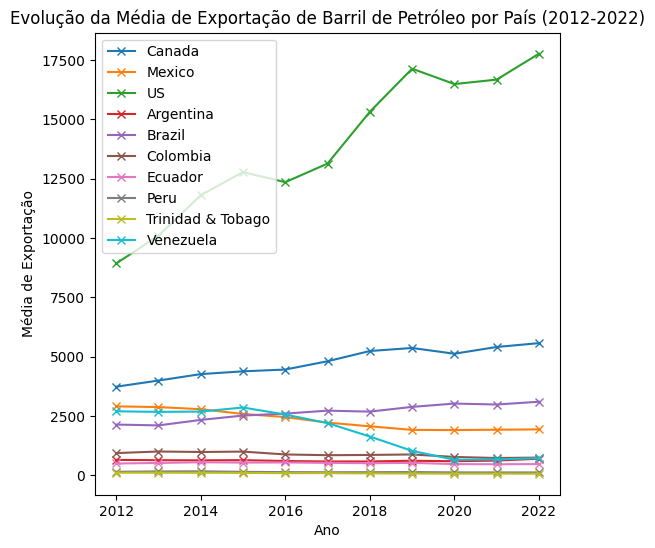

In [14]:
# Plota o gráfico de linhas
paises_df.T.plot(kind='line', figsize=(6, 6), marker='x')

# Adiciona títulos e rótulos
plt.title('Evolução da Média de Exportação de Barril de Petróleo por País (2012-2022)')
plt.xlabel('Ano')
plt.ylabel('Média de Exportação')

# Exibe o gráfico
plt.show()

###Gráficos da evolução do Brasil

De início, optei por criar um dicionário que contém todos os países, cada um associado a um índice.

In [15]:
dic_paises = {
    0: "Canada",
    1: "Mexico",
    2: "US",
    3: "Argentina",
    4: "Brazil",
    5: "Colombia",
    6: "Ecuador",
    7: "Peru",
    8: "Trinidad & Tobago",
    9: "Venezuela"
}


Neste trecho do código, escolho o Brasil conforme requerido pelo trabalho. No entanto, caso seja solicitado outro país ou se simplesmente desejar observar a evolução temporal de uma nação diferente, basta modificar o índice para selecionar o país desejado.

In [16]:
pais_escolhido = dic_paises[4] #Escolhe o brasil
pais_separado = paises_df.loc[pais_escolhido]

# Exibe os dados apenas para o Brasil
print(pais_separado)

2012    2145.0
2013    2110.0
2014    2341.0
2015    2525.0
2016    2607.0
2017    2731.0
2018    2691.0
2019    2890.0
2020    3030.0
2021    2990.0
2022    3107.0
Name: Brazil, dtype: float64


####Média de Exportação ano a ano do Brasil

Text(0, 0.5, 'Média de Exportação (em barris)')

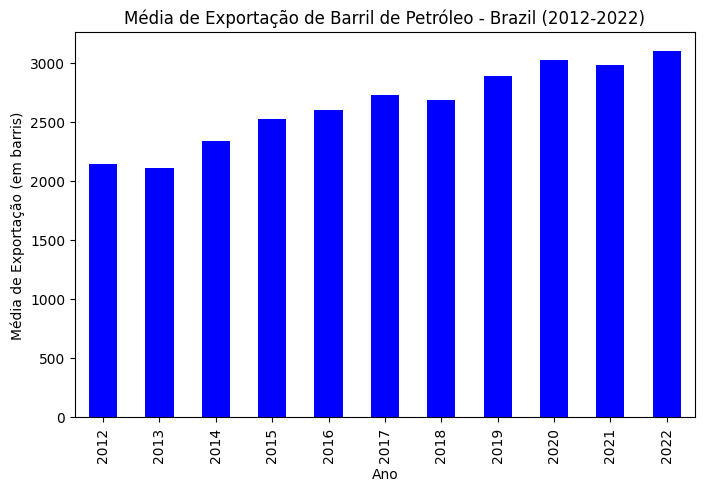

In [17]:
pais_separado.plot(kind='bar', figsize=(8, 5), color='blue')

# Adiciona títulos e rótulos
plt.title('Média de Exportação de Barril de Petróleo - ' + pais_escolhido + ' (2012-2022)')
plt.xlabel('Ano')
plt.ylabel('Média de Exportação (em barris)')

####Comparação da crescimento/decrescimento da exportação de um ano para o outro

Através do gráfico, é possível verificar que a maioria dos anos houve um crescimento em relação ao ano anterior, com excessão de 2013, 2018 e 2021.

In [33]:
# Calcula o crescimento percentual anual
crescimento_percentual = ((pais_separado.pct_change() * 100).dropna()).round(2)
crescimento_percentual


2013    -1.63
2014    10.95
2015     7.86
2016     3.25
2017     4.76
2018    -1.46
2019     7.40
2020     4.84
2021    -1.32
2022     3.91
Name: Brazil, dtype: float64

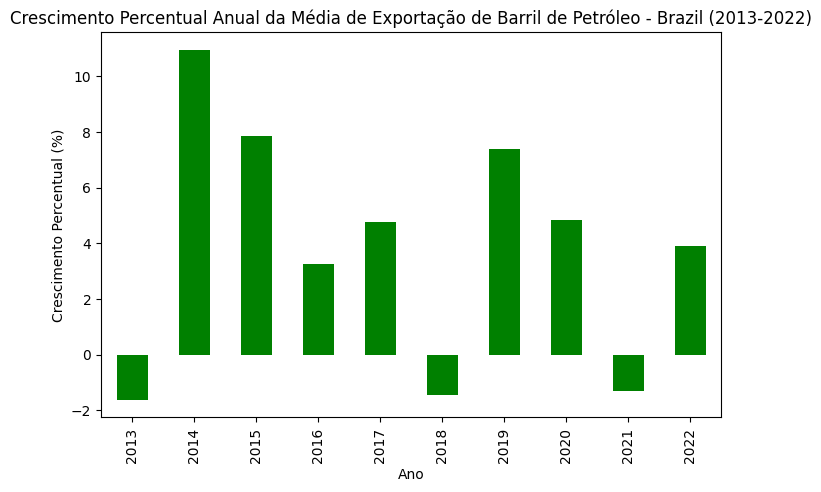

In [22]:
# Plota o gráfico de barras para o crescimento percentual
crescimento_percentual.plot(kind='bar', figsize=(8, 5), color='green')

# Adiciona títulos e rótulos
plt.title('Crescimento Percentual Anual da Média de Exportação de Barril de Petróleo - ' + pais_escolhido + ' (2013-2022)')
plt.xlabel('Ano')
plt.ylabel('Crescimento Percentual (%)')

# Exibe o gráfico
plt.show()

####Crescimento de um determinado ano comparado com 2022

A variável mostra o percental de crescimento em relação a 2022, podemos ver que quanto mais longe, maior o valor, diminuindo gradualmente, mostrando um crescimento gradual ao longo dos anos no número de exportação.

In [31]:
# Calcula o crescimento percentual comparando com 2012

crescimento_10anos = (((pais_separado - pais_separado['2012'])/pais_separado['2012']) * 100).round(2)

crescimento_10anos

2012     0.00
2013    -1.63
2014     9.14
2015    17.72
2016    21.54
2017    27.32
2018    25.45
2019    34.73
2020    41.26
2021    39.39
2022    44.85
Name: Brazil, dtype: float64

No gráfico, é possível perceber que em relação a 2012, houve um crescimento considerável na quantidade diária de exportação.

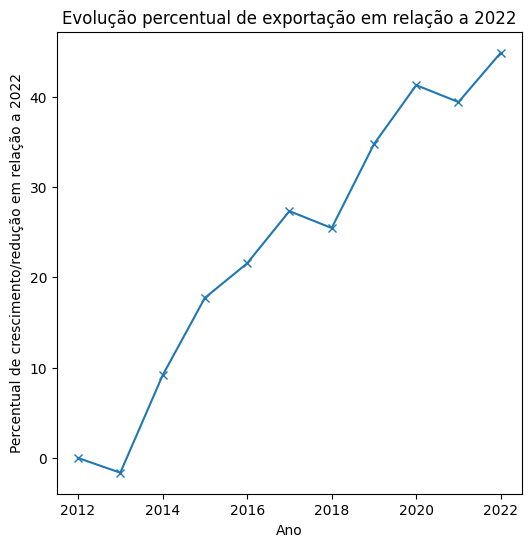

In [32]:
# Plota o gráfico de linhas
crescimento_10anos.plot(kind='line', figsize=(6, 6), marker='x')

# Adiciona títulos e rótulos
plt.title('Evolução percentual de exportação em relação a 2012')
plt.xlabel('Ano')
plt.ylabel('Percentual de crescimento/redução em relação a 2012')

# Exibe o gráfico
plt.show()